In [4]:
import kagglehub
mirichoi0218_insurance_path = kagglehub.dataset_download('mirichoi0218/insurance')

Using Colab cache for faster access to the 'insurance' dataset.


<font size=5 > <p style="color:purple"> Quels facteurs influencent le cout de l'assurance medicale au Etats-Unis?

<font size='2'>De nombreux facteurs influencent le coût de l'assurance maladie. Voici quelques uns :


* **age:** âge du bénéficiaire principal

* **sex:** sexe de l'assuré (femme, homme)


* **bmi:** Aussi connu comme l'indice de masse corporelle (IMC), qui donne une idée de la morphologie et du poids par rapport à la taille.

* **children:** nombre d'enfants couverts par l'assurance maladie / nombre de dependents

* **smoker:** statut de fumeur

* **region:** zone de résidence du bénéficiaire aux États-Unis (Nord-Est, Sud-Est, Sud-Ouest, Nord-Ouest)

<font size=5><p style="color:purple"> Visualisation et AED (Analyse Exploratoire des Donnees)

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.shape

(1338, 7)

In [8]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
df.dtypes

,0
age,int64
sex,object
bmi,float64
children,int64
smoker,object
region,object
charges,float64


In [10]:
df.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


<font size='2' font>Nous n'avons aucune valeur manquante, ce qui est excellent.

 Nous allons d'abord observer la répartition des charges en fonction des facteurs donnés.

Text(0.5, 1.0, 'Distribution des Charges')

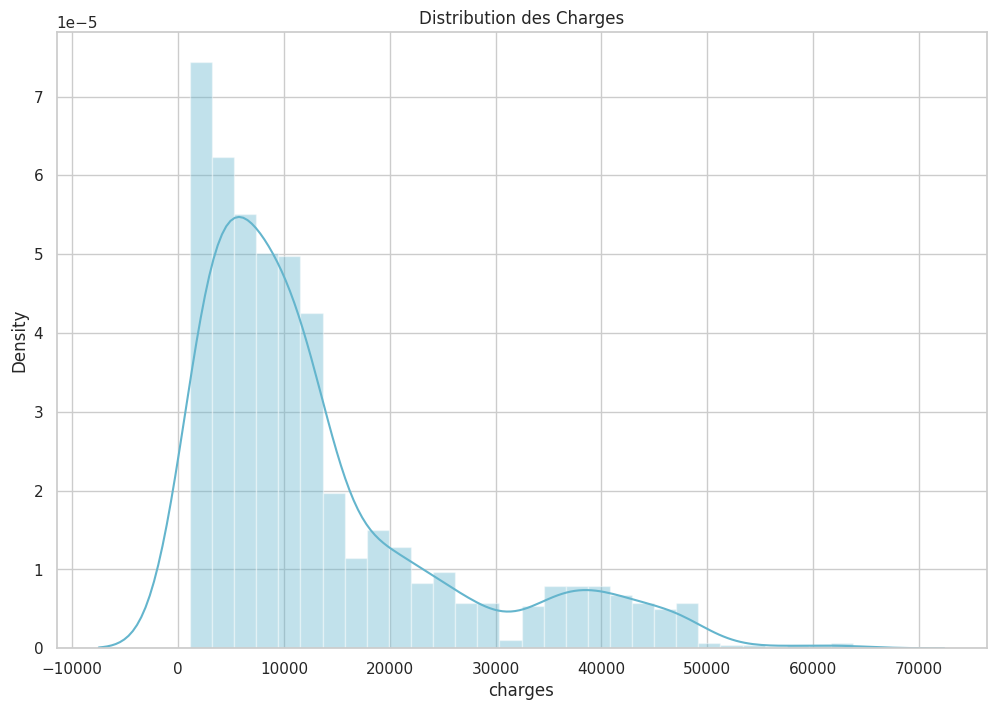

In [11]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'c')
plt.title('Distribution des Charges')

<font size='2' font>Cette distribution est asymétrique à droite. Pour la rendre plus proche d'une distribution normale, on peut appliquer le logarithme népérien.


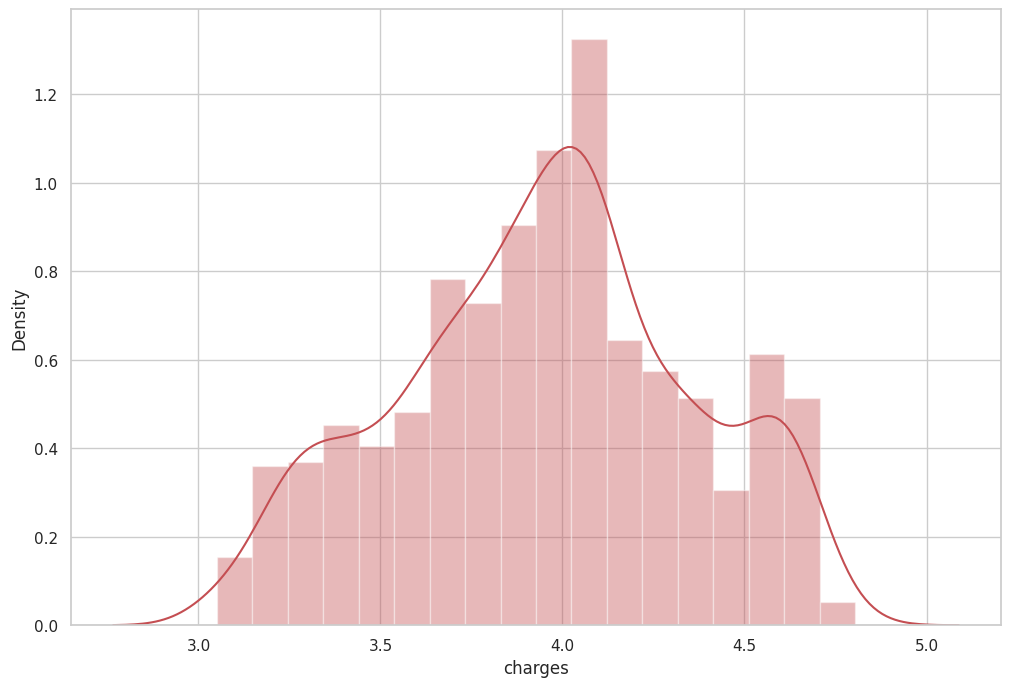

In [12]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.distplot(np.log10(df['charges']), kde = True, color = 'r' )

<font size='2' font> On analyse les differentes charges par region selon les autres facteurs

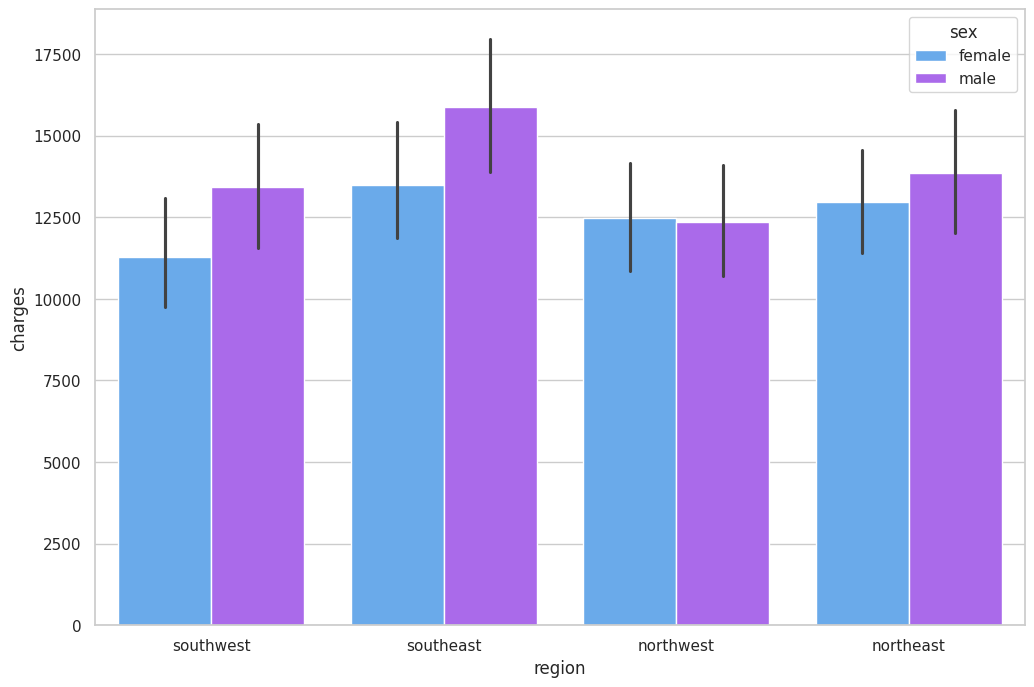

In [13]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

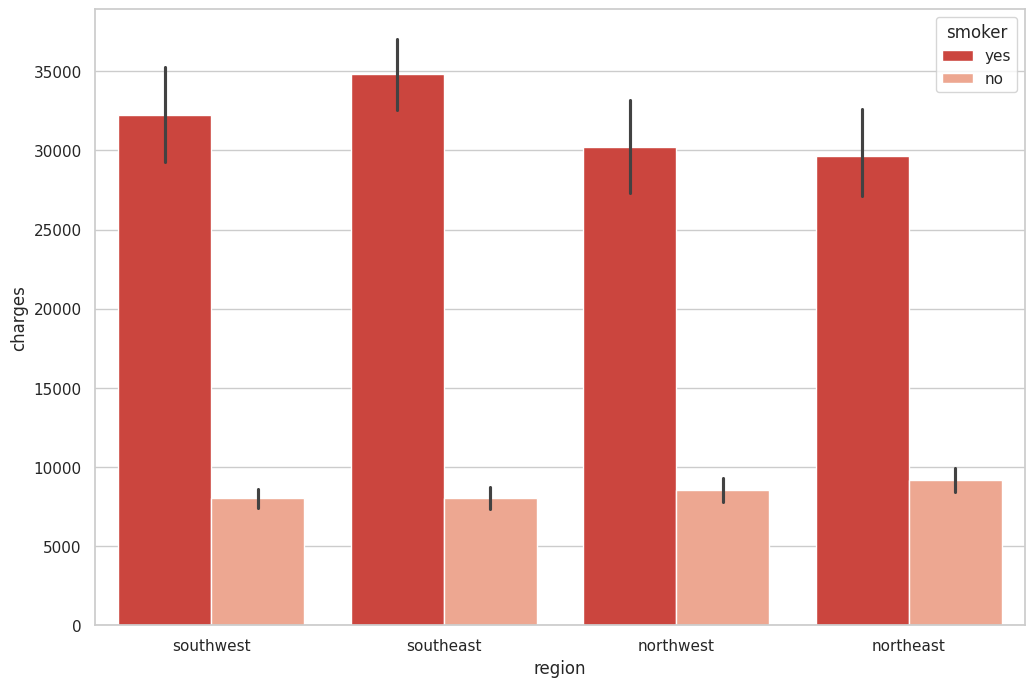

In [14]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

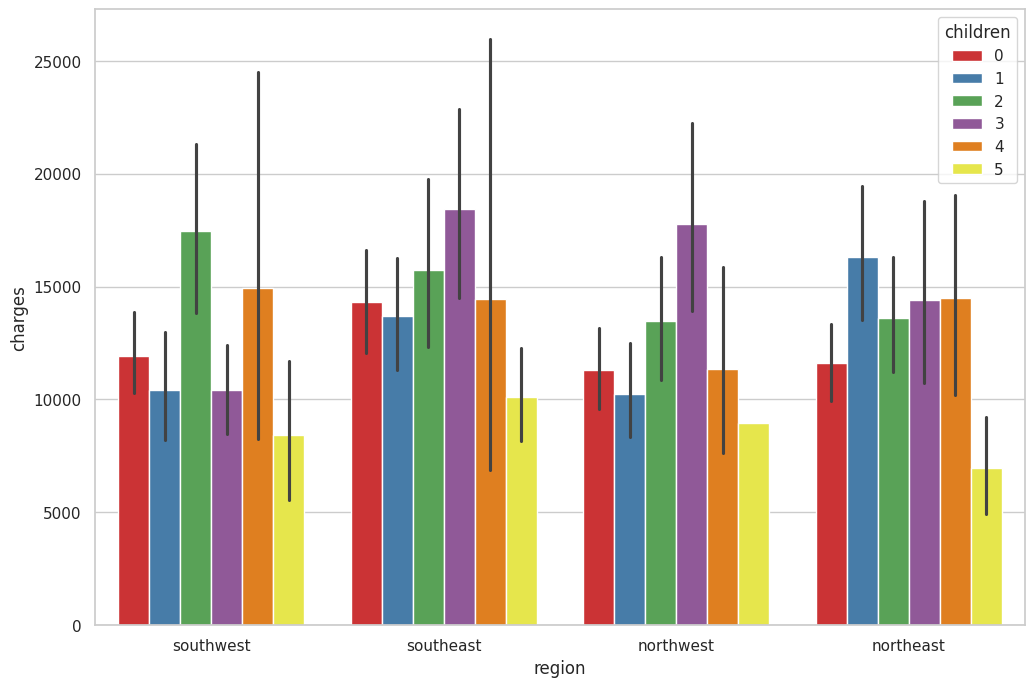

In [15]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

<font size='2' font>Comme le montrent ces graphiques à barres, les coûts les plus élevés liés au tabagisme se situent toujours dans le Sud-Est, tandis que les plus faibles se trouvent dans le Nord-Est. Les habitants du Sud-Ouest fument généralement plus que ceux du Nord-Est, mais les coûts par sexe sont globalement plus élevés dans le Nord-Est que dans le Sud-Ouest et le Nord-Ouest. Par ailleurs, les personnes ayant des enfants ont tendance à engendrer des frais médicaux plus importants.


<font size='2' font>Analysons maintenant les frais médicaux en fonction de l'âge, de l'IMC et du nombre d'enfants, selon le facteur tabagisme.


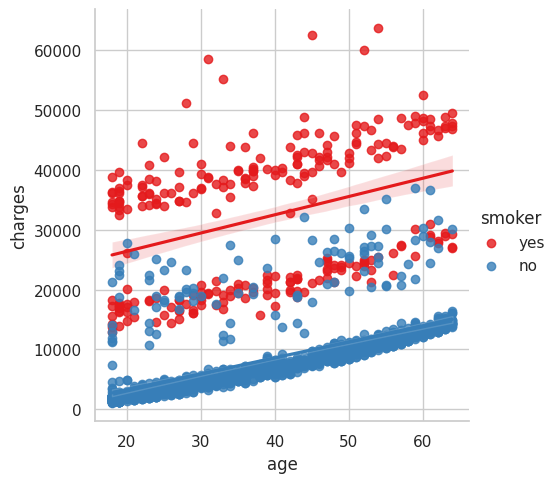

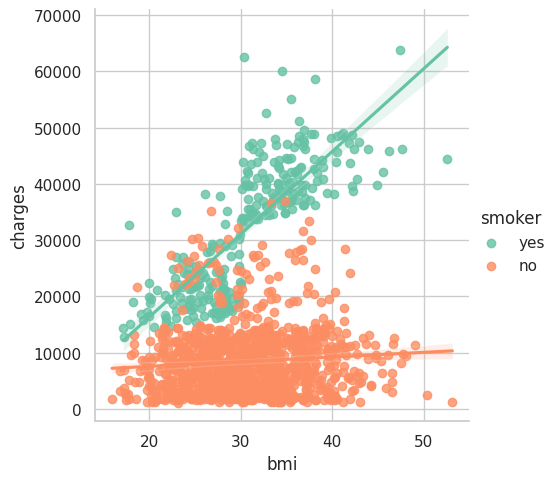

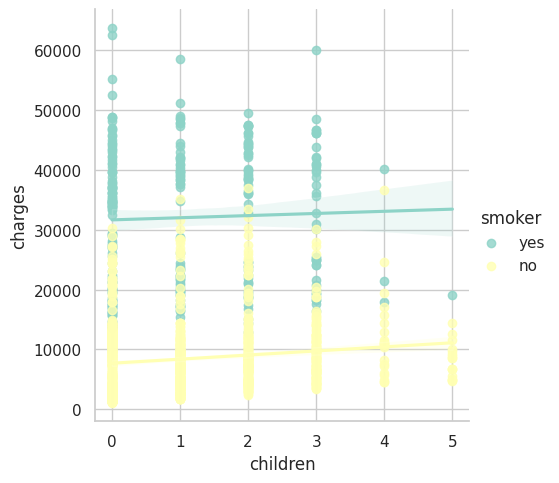

In [16]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

<font size='2' font>Le tabagisme a l'impact le plus important sur les coûts médicaux, même si ces coûts augmentent avec l'âge, l'IMC et le nombre d'enfants. De plus, les personnes ayant des enfants fument généralement moins, comme le montrent également les diagrammes en violon suivants.

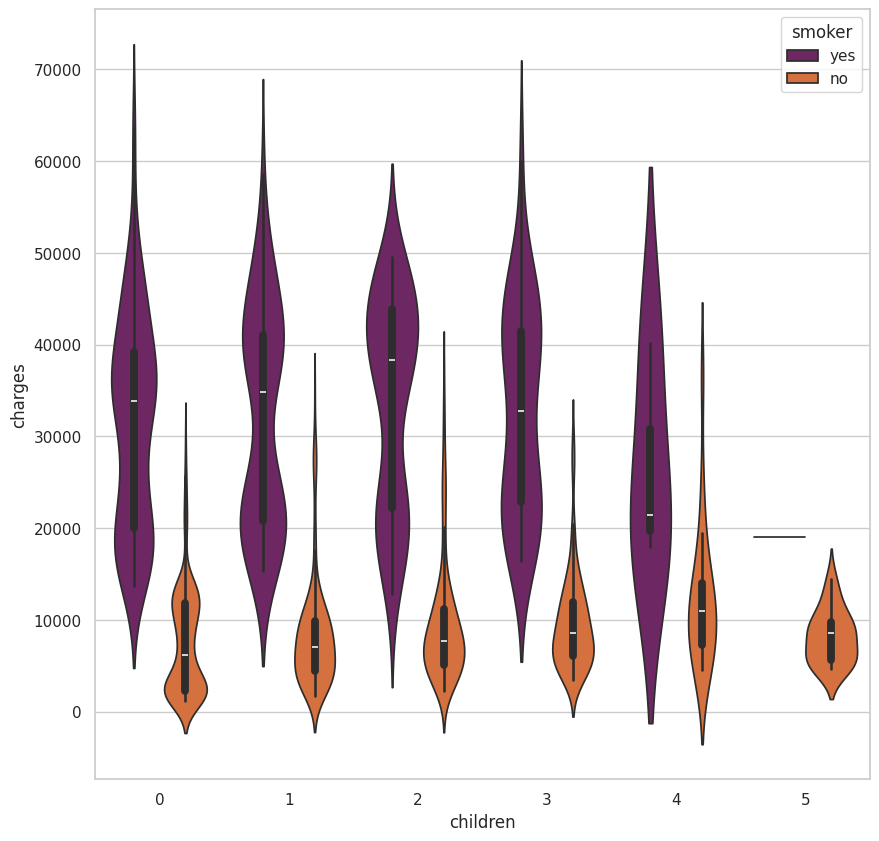

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [18]:
##Converting objects labels into categorical
df[['sex', 'smoker', 'region']] = df[['sex', 'smoker', 'region']].astype('category')
df.dtypes

,0
age,int64
sex,category
bmi,float64
children,int64
smoker,category
region,category
charges,float64


In [19]:
##Converting category labels into numerical using LabelEncoder
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
label.fit(df.sex.drop_duplicates())
df.sex = label.transform(df.sex)
label.fit(df.smoker.drop_duplicates())
df.smoker = label.transform(df.smoker)
label.fit(df.region.drop_duplicates())
df.region = label.transform(df.region)
df.dtypes

,0
age,int64
sex,int64
bmi,float64
children,int64
smoker,int64
region,int64
charges,float64


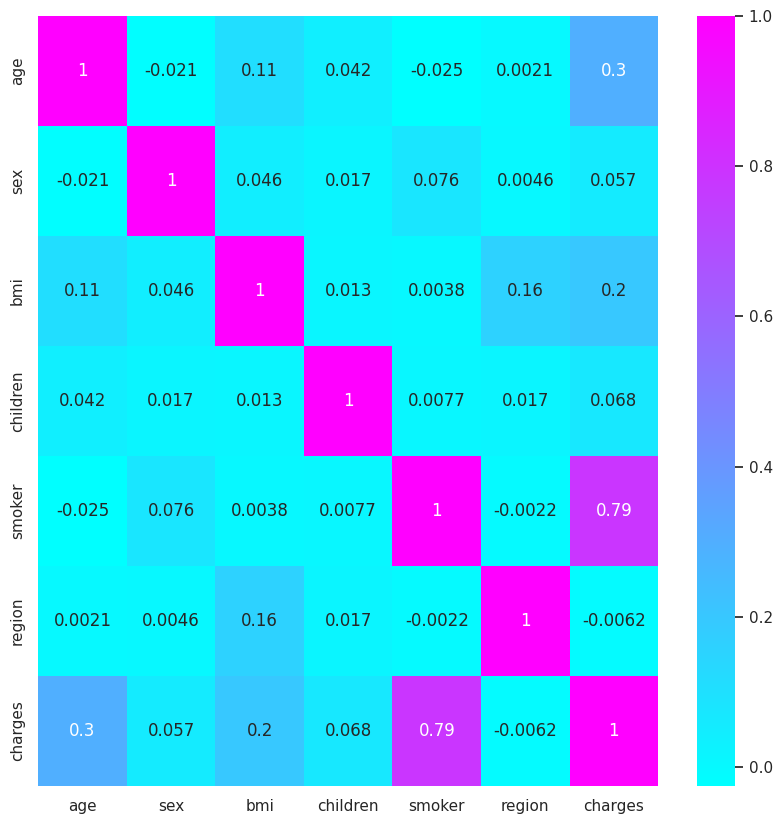

In [20]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

<font size='2' font>Pas de correlation, avec l'exception du tabagisme

<font size=5><p style="color:purple">Regression Lineaire

In [21]:
# -------- Linear Regression From Scratch (SGD) --------
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

class LinearRegressionSGD:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.epochs):
            for i in range(n_samples):
                y_pred = np.dot(X[i], self.w) + self.b
                error = y_pred - y[i]
                self.w -= self.lr * error * X[i]
                self.b -= self.lr * error
                
    def predict(self, X):
        return np.dot(X, self.w) + self.b

# Train-test split
x = df.drop(['charges'], axis=1).values
y = df['charges'].values
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

model_lr = LinearRegressionSGD(lr=0.001, epochs=50)
model_lr.fit(x_train, y_train)

preds = model_lr.predict(x_test)

print("MSE:", mean_squared_error(y_test, preds))
print("R2 Score:", r2_score(y_test, preds))


-11661.98390882441
[  253.99185244   -24.32455098   328.40261701   443.72929547
 23568.87948381  -288.50857254]
0.7998747145449959
mse:  31845929.13415943
RMSE:  5643.219748880902
R2:  0.7998747145449959


<font size='2' font>Ce resultat est assez bon, on pourrait l'ameliorer en reduisant les facteurs moins importants

# Regression Logistique avec le Dataset Iris

<font size='2' font>La régression logistique est le modèle statistique idéal pour les tâches de classification binaire. Par exemple, si vous devez classer des objets, comme distinguer une pomme d'une orange en fonction de caractéristiques telles que la couleur ou la taille, la régression logistique est parfaitement adaptée. Attention toutefois au terme « régression » : contrairement à la régression linéaire qui prédit une variable continue, la régression logistique opère dans le domaine des probabilités, ce qui la rend particulièrement performante pour les résultats dichotomiques, comme les décisions par oui/non ou vrai/faux.

In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# Loading the dataset
iris = load_iris()

# Printing a description
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [23]:
X = iris.data          # variables explicatives
y = iris.target        # classes originales (0,1,2)

# Transformation en classification binaire
y = (y != 0).astype(int)  # 0 vs autres

<font size='2' font>Nous avons ainsi une classification binaire:
Classe 0 et Classe 1(Autres Classes)

Normalisation des variables d'entree

In [24]:
# Séparation train / test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Normalisation
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Modelisation de la probabilite d'appartenance a l'aide de la fonction Sigmoide

In [25]:
# -------- Logistic Regression From Scratch --------
import numpy as np

class LogisticRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        
    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.w = np.zeros(n_features)
        self.b = 0
        
        for _ in range(self.epochs):
            linear = np.dot(X, self.w) + self.b
            y_pred = self.sigmoid(linear)
            
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)
            
            self.w -= self.lr * dw
            self.b -= self.lr * db
    
    def predict(self, X):
        linear = np.dot(X, self.w) + self.b
        probs = self.sigmoid(linear)
        return (probs >= 0.5).astype(int)

# Train model
model = LogisticRegressionScratch(lr=0.1, epochs=1000)
model.fit(X_train, y_train)


LogisticRegression()

Prediction Matrice de confusion

In [26]:
from sklearn.metrics import confusion_matrix

# Prédictions
y_pred = model.predict(X_test)

# Matrice de confusion
cm = confusion_matrix(y_test, y_pred)
print("Matrice de Confusion :\n", cm)

Matrice de Confusion :
 [[19  0]
 [ 0 26]]


<font size='2' font> Pas de FN ou de FP



Evaluation du modele

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print("Accuracy :", accuracy)
print("Précision :", precision)
print("Recall :", recall)

Accuracy : 1.0
Précision : 1.0
Recall : 1.0


on verifie si le modele a subit du durapprentissage

In [28]:
# Evaluating the model on the training set
train_accuracy = model.score(X_train, y_train)
print("Training Accuracy:", train_accuracy)

# Evaluating the model on the test set
test_accuracy = model.score(X_test, y_test)
print("Test Accuracy:", test_accuracy)

Training Accuracy: 1.0
Test Accuracy: 1.0


<font size='2' font>Il est essentiel de comparer ces deux indicateurs. Si la précision de l'entraînement est nettement supérieure à celle des tests, cela peut indiquer un surapprentissage du modèle. À l'inverse, si les deux précisions sont faibles, le modèle est peut-être en sous-apprentissage.